<a href="https://colab.research.google.com/github/shloak17107/airline-delay-prediction/blob/main/Vatsal_Copy_of_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%pip install aiohttp aiofiles tqdm nest_asyncio seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 4.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### DATASET DOWNLOADING LINKS

In [5]:
# On-time Performance data for each month of 2024
dataset_links = [
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_1.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_2.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_3.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_4.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_5.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_6.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_7.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_8.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_9.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_10.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_11.zip",
    "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_12.zip"
]

### IMPORTING LIBRARIES

In [70]:
import aiohttp
import asyncio
import zipfile
import os
from tqdm.asyncio import tqdm
import aiofiles
import nest_asyncio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

# Downloading and Preparing Concatenated Dataframe

In [7]:
# Enable nested event loops
nest_asyncio.apply()

async def download_file(session, url, filename):
    async with session.get(url) as response:
        if response.status == 200:
            async with aiofiles.open(filename, mode='wb') as f:
                await f.write(await response.read())
            return True
    return False

async def process_file(session, link):
    filename = os.path.join('data', os.path.basename(link))
    csv_name = filename.replace('.zip', '.csv')

    if os.path.exists(csv_name):
        return f'Skipping {filename} - CSV already exists'

    try:
        # Download file
        success = await download_file(session, link, filename)
        if not success:
            return f'Failed to download {filename}'

        tqdm.write(f'Downloaded {filename}')

        # Unzip file
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('data')

        # Remove zip file
        os.remove(filename)
        return f'Extracted {filename}'

    except Exception as e:
        return f'Error processing {filename}: {str(e)}'

async def main(links):
    os.makedirs('data', exist_ok=True)

    async with aiohttp.ClientSession() as session:
        tasks = [process_file(session, link) for link in links]
        results = []
        for result in tqdm(asyncio.as_completed(tasks), total=len(tasks)):
            results.append(await result)
            tqdm.write(results[-1])

# Run the async code using asyncio.run()
asyncio.run(main(dataset_links))

  0%|          | 0/12 [00:23<?, ?it/s]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_4.zip


  8%|▊         | 1/12 [00:24<04:24, 24.09s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_4.zip
Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_9.zip


 17%|█▋        | 2/12 [00:24<01:43, 10.30s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_9.zip
Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_3.zip


 25%|██▌       | 3/12 [00:27<00:59,  6.66s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_3.zip


 25%|██▌       | 3/12 [00:28<00:59,  6.66s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_5.zip


 33%|███▎      | 4/12 [00:30<00:42,  5.29s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_5.zip


 33%|███▎      | 4/12 [00:31<00:42,  5.29s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_6.zip


 42%|████▏     | 5/12 [00:31<00:27,  3.88s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_6.zip


 42%|████▏     | 5/12 [00:32<00:27,  3.88s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_7.zip


 50%|█████     | 6/12 [00:35<00:24,  4.03s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_7.zip


 50%|█████     | 6/12 [00:40<00:24,  4.03s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_8.zip


 58%|█████▊    | 7/12 [00:41<00:22,  4.47s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_8.zip


 58%|█████▊    | 7/12 [01:34<00:22,  4.47s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_2.zip


 67%|██████▋   | 8/12 [01:35<01:21, 20.31s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_2.zip


 67%|██████▋   | 8/12 [01:41<01:21, 20.31s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_1.zip


 75%|███████▌  | 9/12 [01:42<00:48, 16.24s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_1.zip


 75%|███████▌  | 9/12 [01:47<00:48, 16.24s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_11.zip


 83%|████████▎ | 10/12 [01:47<00:25, 12.81s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_11.zip


 83%|████████▎ | 10/12 [01:51<00:25, 12.81s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_12.zip


 92%|█████████▏| 11/12 [01:52<00:10, 10.16s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_12.zip


 92%|█████████▏| 11/12 [01:59<00:10, 10.16s/it]

Downloaded data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_10.zip


100%|██████████| 12/12 [01:59<00:00,  9.96s/it]

Extracted data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2024_10.zip


In [8]:
# Get all CSV files in the data directory
csv_files = glob.glob('data/*.csv')

In [9]:
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
print(df.shape)
df.head()

(7079061, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,3,8,9,5,2024-08-09,AA,19805,AA,N452AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,3,8,10,6,2024-08-10,AA,19805,AA,N407AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,3,8,11,7,2024-08-11,AA,19805,AA,N464AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,3,8,12,1,2024-08-12,AA,19805,AA,N408AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,3,8,13,2,2024-08-13,AA,19805,AA,N400AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save the concatenated dataframe to a CSV
# df.to_csv('data/combined_flights.csv', index=False)

# Read back the saved CSV file to verify
# df = pd.read_csv('data/combined_flights.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079061 entries, 0 to 7079060
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(70), int64(19), object(21)
memory usage: 5.8+ GB


# Filtering df for flights departing from SFO

In [53]:
print(df.columns.tolist())

['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FirstDepTime', 'TotalAddGTime'

In [54]:
# Filter flights departing from SFO
df = df[df['Origin'] == 'SFO']
print(f"Total number of flights from SFO: {len(df)}")

Total number of flights from SFO: 134978


In [55]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,...,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
49,2024,3,8,1,4,2024-08-01,AA,19805,AA,N176UW,479.0,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,902,1307.0,245.0,245.0,1.0,12.0,0900-0959,19.0,1326.0,1835.0,17.0,1436,1852.0,256.0,256.0,1.0,12.0,1400-1459,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,2024,3,8,2,5,2024-08-02,AA,19805,AA,N153AN,479.0,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,902,926.0,24.0,24.0,1.0,1.0,0900-0959,12.0,938.0,1444.0,6.0,1436,1450.0,14.0,14.0,0.0,0.0,1400-1459,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,2024,3,8,3,6,2024-08-03,AA,19805,AA,N151UW,479.0,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,902,NaN,NaN,NaN,NaN,NaN,0900-0959,NaN,NaN,NaN,NaN,1436,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,A,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,2024,3,8,4,7,2024-08-04,AA,19805,AA,N160AN,479.0,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,902,NaN,NaN,NaN,NaN,NaN,0900-0959,NaN,NaN,NaN,NaN,1436,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,A,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2024,3,8,5,1,2024-08-05,AA,19805,AA,N556UW,479.0,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,902,1435.0,333.0,333.0,1.0,12.0,0900-0959,16.0,1451.0,1951.0,8.0,1436,1959.0,323.0,323.0,1.0,12.0,1400-1459,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filtering out cancelled or diverted flights

In [56]:
# Count total flights before filtering
total_before = len(df)

# Filter out cancelled and diverted flights
df = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)]

# Print statistics
removed = total_before - len(df)
print(f"Removed {removed} cancelled or diverted flights")
print(f"Number of flights after filtering: {len(df)}")

Removed 2132 cancelled or diverted flights
Number of flights after filtering: 132846


# EDA

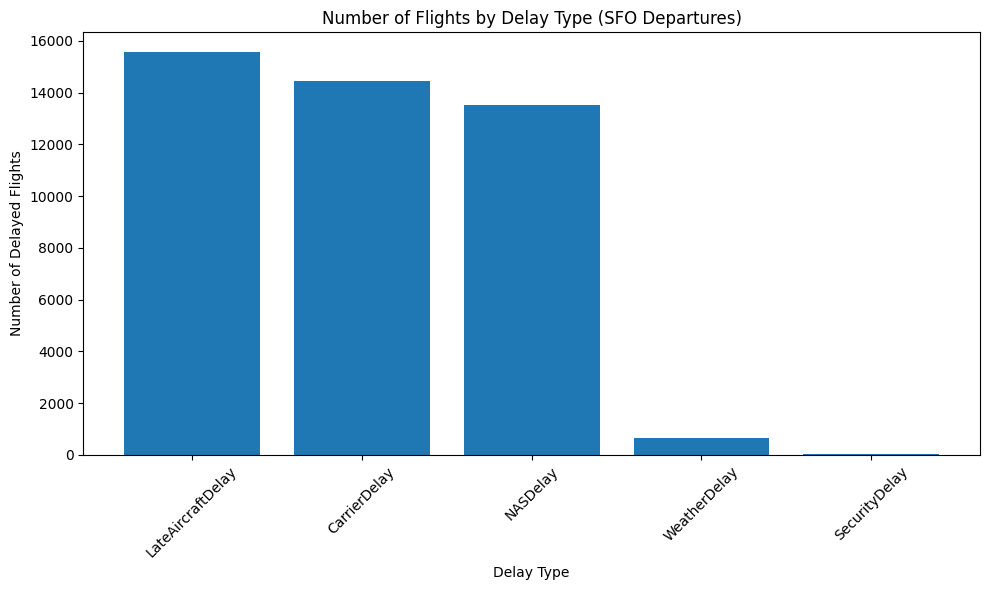

In [57]:
# Calculate average delay duration for each delay type
plt.figure(figsize=(10, 6))
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Count number of flights with each type of delay (non-zero values)
delay_counts = {}
for delay_type in delay_types:
    delay_counts[delay_type] = df[df[delay_type] > 0][delay_type].count()

# Sort delay types by count in descending order
sorted_items = sorted(delay_counts.items(), key=lambda x: x[1], reverse=True)
sorted_types = [x[0] for x in sorted_items]
sorted_counts = [x[1] for x in sorted_items]

# Create bar plot
plt.bar(sorted_types, sorted_counts)
plt.title('Number of Flights by Delay Type (SFO Departures)')
plt.xlabel('Delay Type')
plt.ylabel('Number of Delayed Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/34/hzsvcl4d3md6r7rn4l2m0spw0000gn/T/ipykernel_28521/4130084143.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delays.index, y=avg_delays.values, palette='mako')


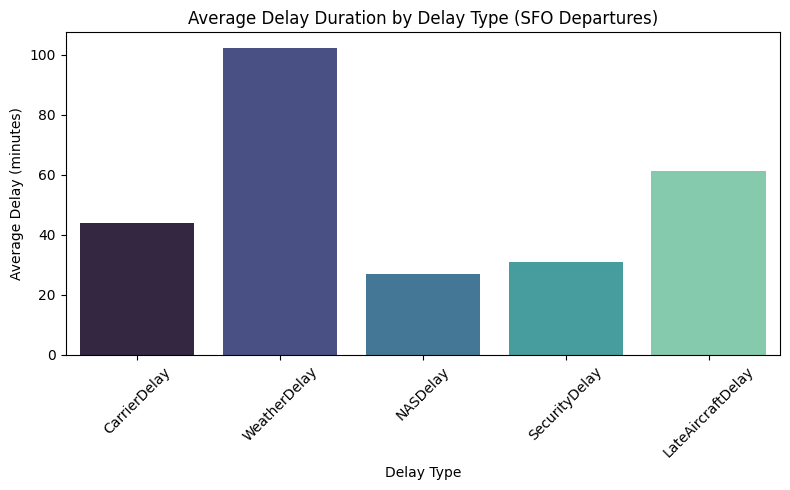

In [58]:
# Calculate average delays
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
avg_delays = pd.Series({delay_type: df[df[delay_type] > 0][delay_type].mean() for delay_type in delay_types})

# Plot average delay by delay type
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_delays.index, y=avg_delays.values, palette='mako')
plt.title('Average Delay Duration by Delay Type (SFO Departures)')
plt.xlabel('Delay Type')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/34/hzsvcl4d3md6r7rn4l2m0spw0000gn/T/ipykernel_28521/2384711310.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dests.index, y=top_dests.values, palette='viridis')


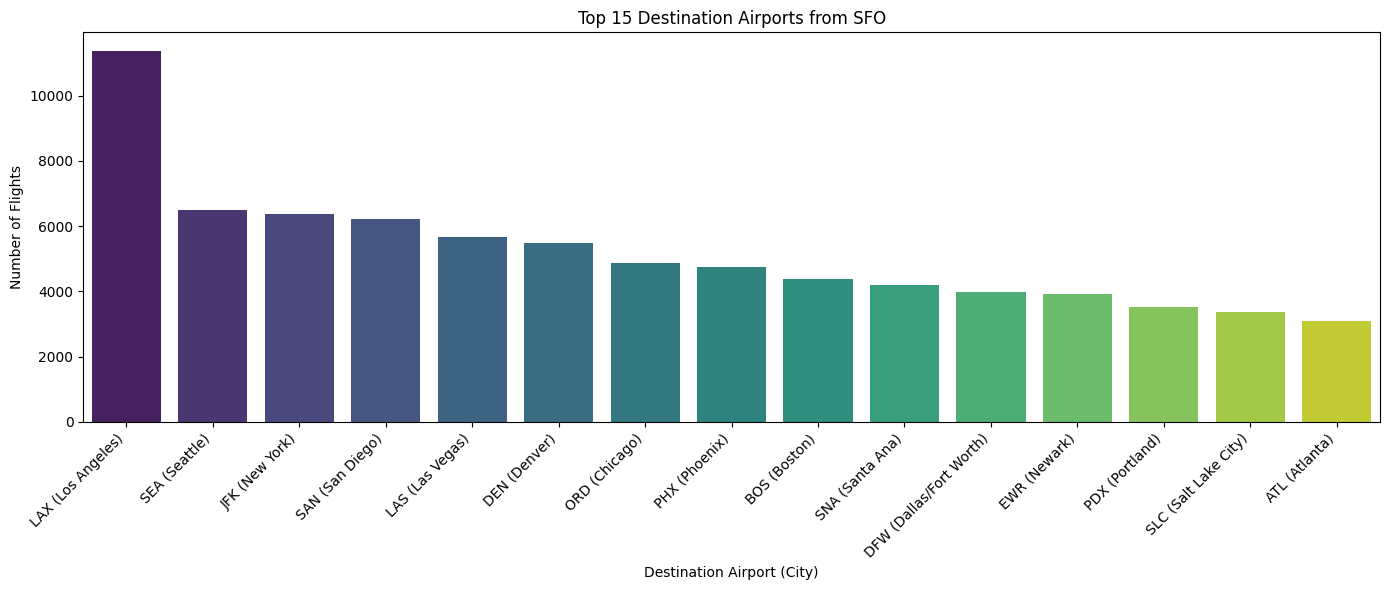

/var/folders/34/hzsvcl4d3md6r7rn4l2m0spw0000gn/T/ipykernel_28521/2384711310.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delay_airline.index, y=avg_delay_airline.values, palette='coolwarm')


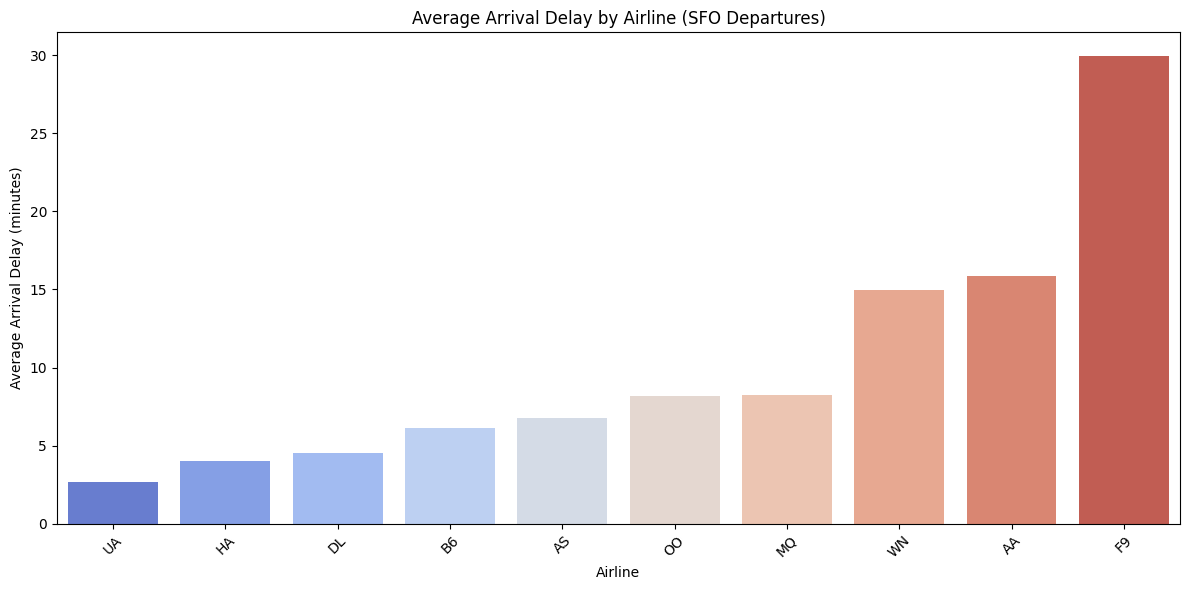

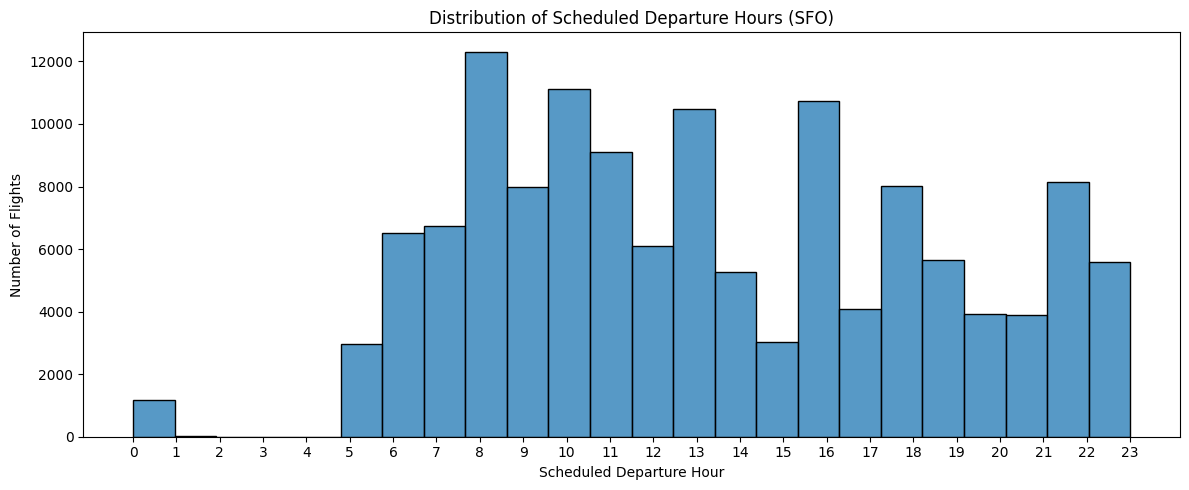

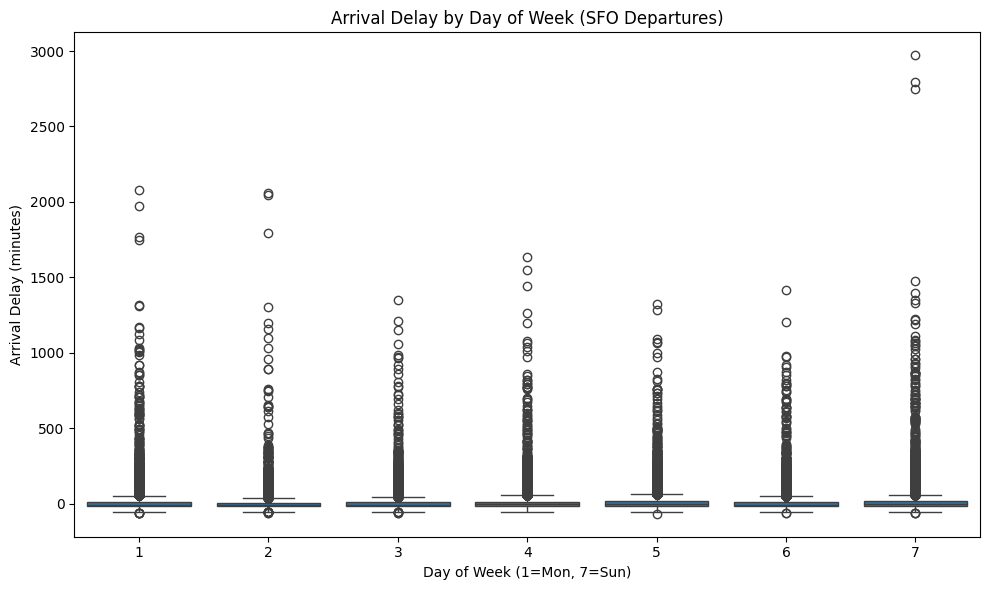

In [59]:
# Distribution of flights by destination airport
plt.figure(figsize=(14, 6))
top_dests = df['Dest'].value_counts().head(15)
dest_labels = [f"{airport} ({df[df['Dest']==airport]['DestCityName'].iloc[0].split(',')[0]})" 
               for airport in top_dests.index]
sns.barplot(x=top_dests.index, y=top_dests.values, palette='viridis')
plt.title('Top 15 Destination Airports from SFO')
plt.xlabel('Destination Airport (City)')
plt.ylabel('Number of Flights')
plt.xticks(range(len(dest_labels)), dest_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average arrival delay by airline
plt.figure(figsize=(12, 6))
avg_delay_airline = df.groupby('Reporting_Airline')['ArrDelay'].mean().sort_values()
sns.barplot(x=avg_delay_airline.index, y=avg_delay_airline.values, palette='coolwarm')
plt.title('Average Arrival Delay by Airline (SFO Departures)')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of scheduled departure times
plt.figure(figsize=(12, 5))
sns.histplot(df['CRSDepTime'] % 2400 // 100, bins=24, kde=False)
plt.title('Distribution of Scheduled Departure Hours (SFO)')
plt.xlabel('Scheduled Departure Hour')
plt.ylabel('Number of Flights')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Boxplot of arrival delay by day of week
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='ArrDelay', data=df)
plt.title('Arrival Delay by Day of Week (SFO Departures)')
plt.xlabel('Day of Week (1=Mon, 7=Sun)')
plt.ylabel('Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

# Dropping columns, Missig values, and Changing dtype

In [60]:
# Create list of columns which are useful for analysis and prediction
useful_columns = [
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'Reporting_Airline',
    # 'Origin',  # not needed for only SFO departures
    'Dest',
    'Distance',
    'DistanceGroup',
    'CRSDepTime',
    'CRSArrTime',
    'DepTimeBlk',
    'ArrTimeBlk',
    'ArrDelay',
    'ArrDel15'
]

df = df[useful_columns]


In [61]:
df.head()

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Dest,Distance,DistanceGroup,CRSDepTime,CRSArrTime,DepTimeBlk,ArrTimeBlk,ArrDelay,ArrDel15
49,8,1,4,AA,DFW,1464.0,6,902,1436,0900-0959,1400-1459,256.0,1.0
50,8,2,5,AA,DFW,1464.0,6,902,1436,0900-0959,1400-1459,14.0,0.0
53,8,5,1,AA,DFW,1464.0,6,902,1436,0900-0959,1400-1459,323.0,1.0
4724,8,1,4,AA,MIA,2585.0,11,800,1638,0800-0859,1600-1659,-10.0,0.0
4725,8,2,5,AA,MIA,2585.0,11,800,1638,0800-0859,1600-1659,-3.0,0.0


In [65]:
# Save the cleaned dataframe to a CSV
df.to_csv('data/cleaned_flights.csv', index=False)

# Read back the cleaned CSV file
# df = pd.read_csv('data/cleaned_flights.csv')

In [62]:
# Calculate missing values statistics
missing_stats = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

# Only show columns with missing values
missing_stats = missing_stats[missing_stats['Missing Count'] > 0]

if len(missing_stats) > 0:
    print("Columns with missing values:")
    print(missing_stats)
else:
    print("No missing values found in any column!")

No missing values found in any column!


In [66]:
df['Reporting_Airline'] = df['Reporting_Airline'].astype('category')
df['Dest'] = df['Dest'].astype('category')
df['ArrDel15'] = df['ArrDel15'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132846 entries, 49 to 7079052
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Month              132846 non-null  int64   
 1   DayofMonth         132846 non-null  int64   
 2   DayOfWeek          132846 non-null  int64   
 3   Reporting_Airline  132846 non-null  category
 4   Dest               132846 non-null  category
 5   Distance           132846 non-null  float64 
 6   DistanceGroup      132846 non-null  int64   
 7   CRSDepTime         132846 non-null  int64   
 8   CRSArrTime         132846 non-null  int64   
 9   DepTimeBlk         132846 non-null  object  
 10  ArrTimeBlk         132846 non-null  object  
 11  ArrDelay           132846 non-null  float64 
 12  ArrDel15           132846 non-null  int64   
dtypes: category(2), float64(2), int64(7), object(2)
memory usage: 12.4+ MB


# Preprocessing

In [ ]:
columns_to_drop_after_EDA = []

In [ ]:
# Create one-hot encoding for Month
temp = pd.get_dummies(df['Month'], prefix='Month')

# Add the encoded columns to the dataframe
df = pd.concat([df, temp], axis=1)

# Add Month to columns to drop after EDA since we've encoded it
columns_to_drop_after_EDA.append('Month')

In [ ]:
# Scale DayofMonth using StandardScaler
scaler = StandardScaler()
df['DayofMonth'] = scaler.fit_transform(df[['DayofMonth']])

In [ ]:
# One-hot encode DayOfWeek
dayofweek_dummies = pd.get_dummies(df['DayOfWeek'], prefix='DayOfWeek')
df = pd.concat([df, dayofweek_dummies], axis=1)

# Add DayOfWeek to columns to drop after EDA since we've encoded it
columns_to_drop_after_EDA.append('DayOfWeek')

In [ ]:
# Create one-hot encoding for Reporting_Airline
temp = pd.get_dummies(df['Reporting_Airline'], prefix='Airline')

# Add the encoded columns to the dataframe
df = pd.concat([df, temp], axis=1)

# Add Reporting_Airline to columns to drop after EDA since we've encoded it
columns_to_drop_after_EDA.append('Reporting_Airline')

In [ ]:
# preprocessing each column to prepare for prediction

# More EDA

In [ ]:
sns.set(style="whitegrid")

# Extract Hour from Scheduled Departure Time
df['DepHour'] = df['CRSDepTime'].apply(lambda x: int(str(int(x)).zfill(4)[:2]))

# Flag: Weekend
df['IsWeekend'] = df['DayOfWeek'].isin([6, 7]).astype(int)

# Convert airline, origin, and dest to category
cat_cols = ['Reporting_Airline', 'Origin', 'Dest']
df[cat_cols] = df[cat_cols].astype('category')

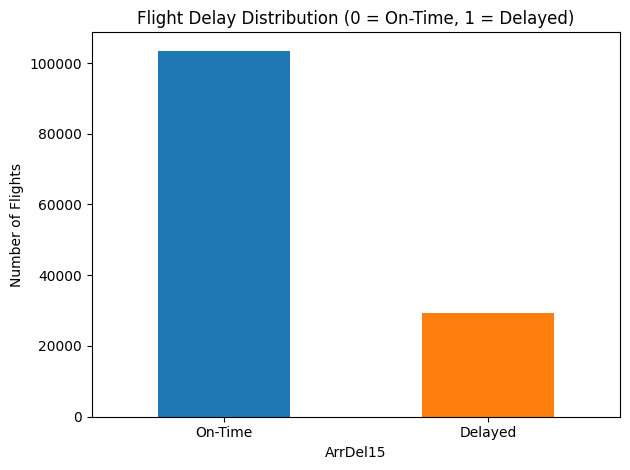

In [68]:
# Plot distribution of delayed vs on-time flights using ArrDel15 (0 = On-Time, 1 = Delayed)
df['ArrDel15'].value_counts().sort_index().plot(
    kind='bar',
    color=['tab:blue', 'tab:orange'],
    rot=0
)
plt.title('Flight Delay Distribution (0 = On-Time, 1 = Delayed)')
plt.xlabel('ArrDel15')
plt.ylabel('Number of Flights')
plt.xticks([0, 1], ['On-Time', 'Delayed'], rotation=0)
plt.tight_layout()
plt.show()


/var/folders/34/hzsvcl4d3md6r7rn4l2m0spw0000gn/T/ipykernel_28521/151468740.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_rate_by_airline = df.groupby('Reporting_Airline')['ArrDel15'].mean().reset_index()
/var/folders/34/hzsvcl4d3md6r7rn4l2m0spw0000gn/T/ipykernel_28521/151468740.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_rate_by_airline, x='Reporting_Airline', y='ArrDel15', palette='Set2')


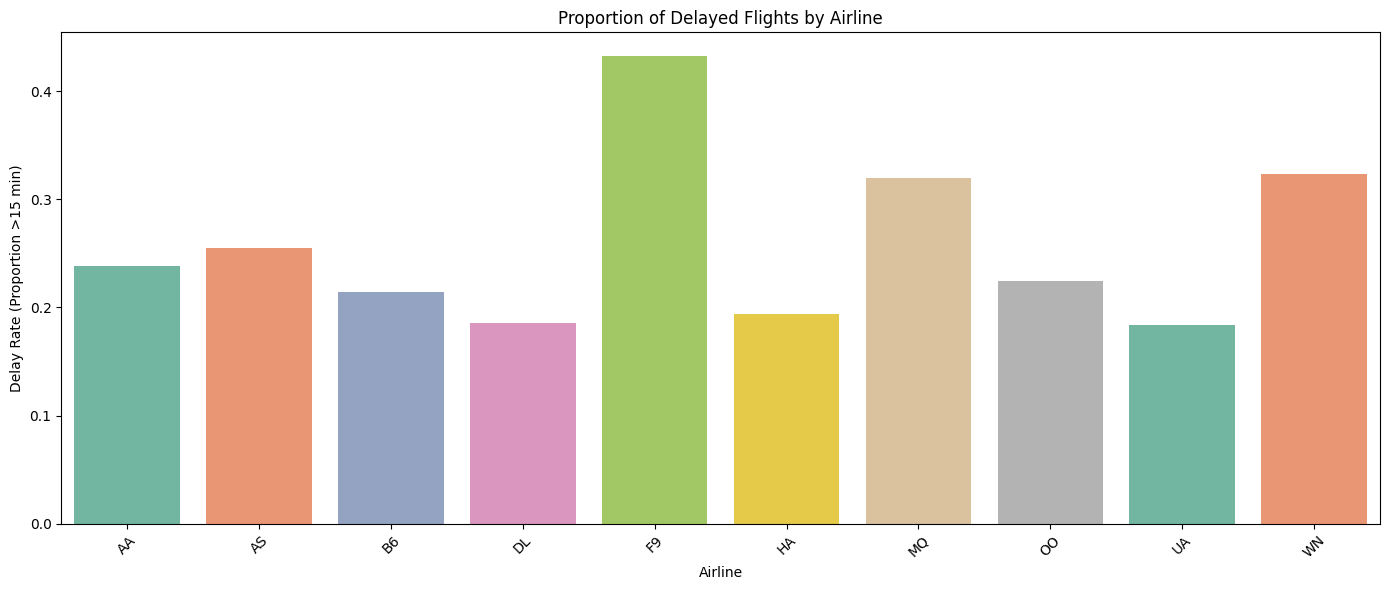

In [69]:
# Group by airline and calculate average delay rate
delay_rate_by_airline = df.groupby('Reporting_Airline')['ArrDel15'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=delay_rate_by_airline, x='Reporting_Airline', y='ArrDel15', palette='Set2')

plt.title('Proportion of Delayed Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay Rate (Proportion >15 min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

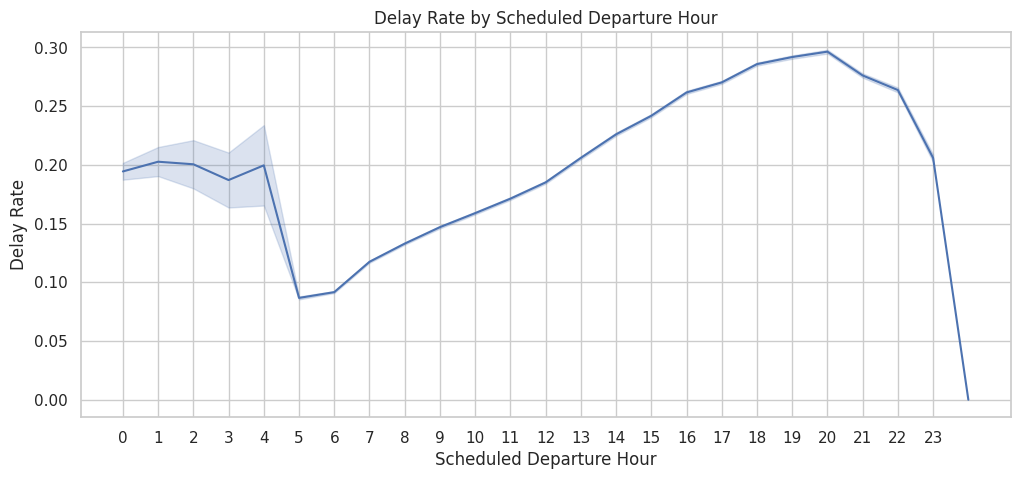

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='DepHour', y='IsDelayed', data=df)
plt.title('Delay Rate by Scheduled Departure Hour')
plt.ylabel('Delay Rate')
plt.xlabel('Scheduled Departure Hour')
plt.xticks(range(0, 24))
plt.show()

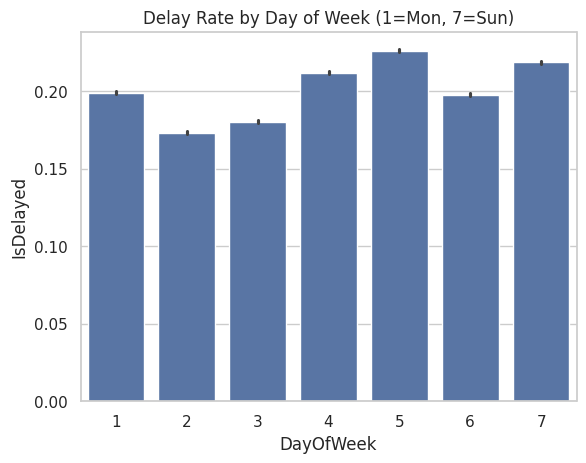

In [ ]:
sns.barplot(x='DayOfWeek', y='IsDelayed', data=df)
plt.title('Delay Rate by Day of Week (1=Mon, 7=Sun)')
plt.show()

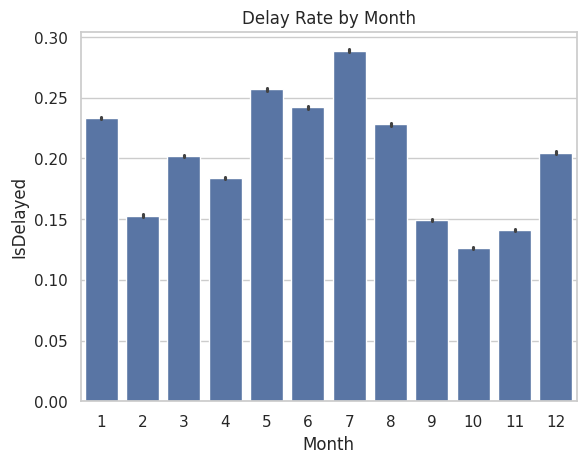

In [ ]:
sns.barplot(x='Month', y='IsDelayed', data=df)
plt.title('Delay Rate by Month')
plt.show()

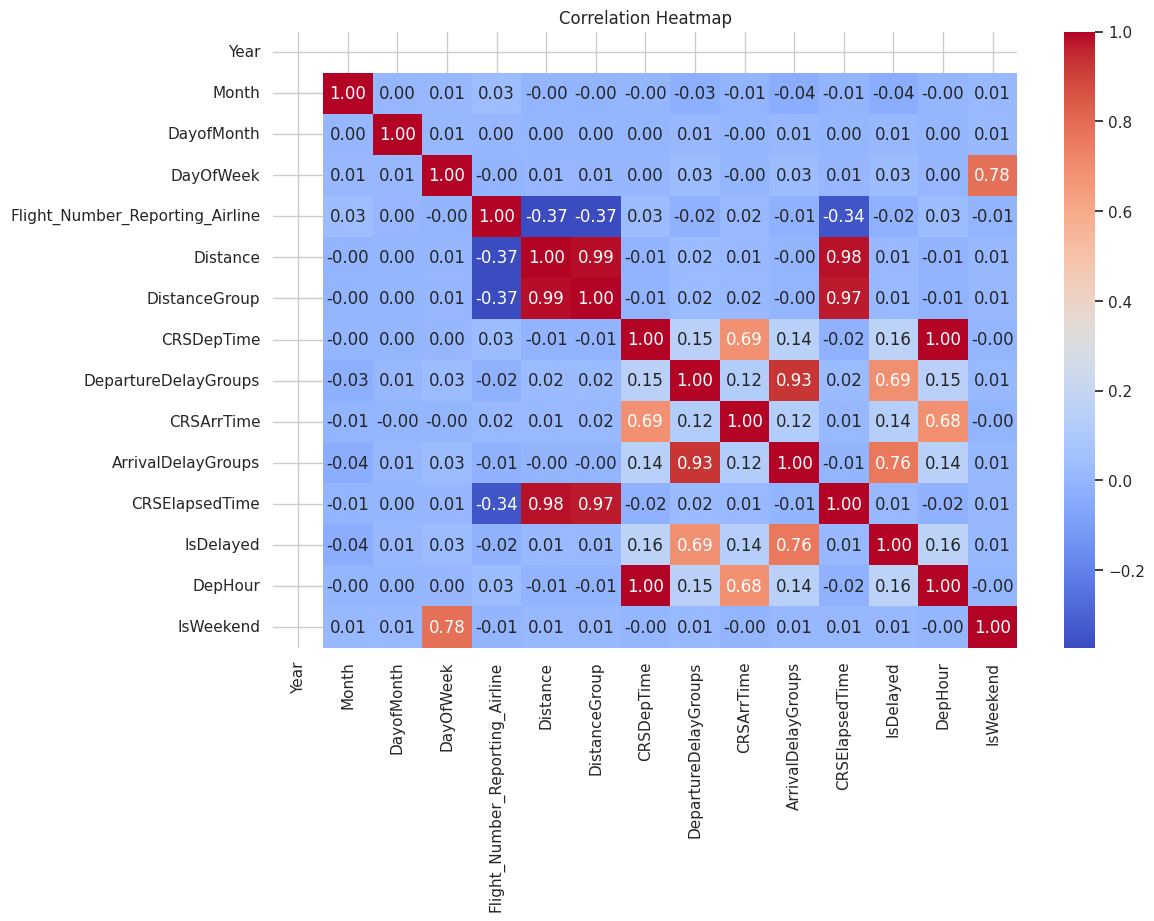

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

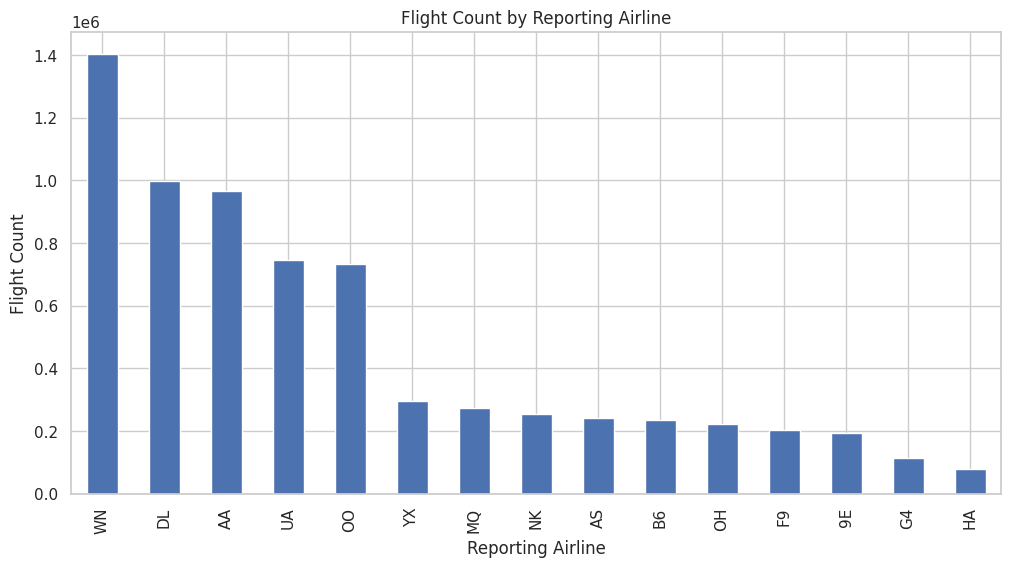

In [ ]:
plt.figure(figsize=(12, 6))
df["Reporting_Airline"].value_counts().plot(kind = 'bar')
plt.title("Flight Count by Reporting Airline")
plt.xlabel("Reporting Airline")
plt.ylabel("Flight Count")
plt.show()


<ipython-input-32-4892a57dfb7c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_rate_by_airline = df.groupby('Reporting_Airline')['IsDelayed'].mean().reset_index()
<ipython-input-32-4892a57dfb7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_rate_by_airline, x='Reporting_Airline', y='IsDelayed', palette='Set2')


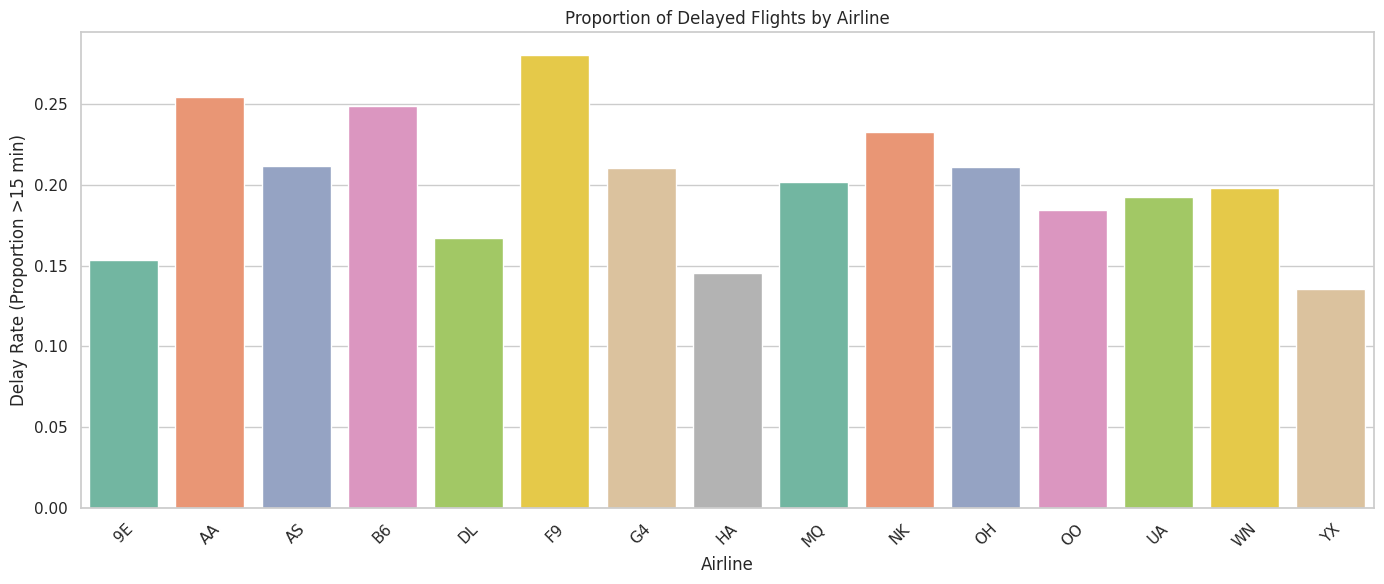

In [ ]:
# Group by airline and calculate average delay rate
delay_rate_by_airline = df.groupby('Reporting_Airline')['IsDelayed'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=delay_rate_by_airline, x='Reporting_Airline', y='IsDelayed', palette='Set2')

plt.title('Proportion of Delayed Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay Rate (Proportion >15 min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
features = [
    'Month', 'DayOfWeek', 'CRSDepTime', 'Distance',
    'DepHour', 'IsWeekend', 'Reporting_Airline', 'Origin', 'Dest'
]

target = 'IsDelayed'

In [ ]:
# Separate X and y
X = df[features]
y = df[target]

# Categorical and numeric columns
cat_cols = ['Reporting_Airline', 'Origin', 'Dest']
num_cols = ['Month', 'DayOfWeek', 'CRSDepTime', 'Distance', 'DepHour', 'IsWeekend']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Model pipeline
model = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train
model.fit(X_train, y_train)

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
